# Model Test With images

## Importing Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load The Model And Defining Class Labels

In [2]:
new_model = tf.keras.models.load_model('models/Eye_Model2.h5')
class_names = ['Close-Eyes', 'Open-Eyes']

## Loading and Displaying an Image


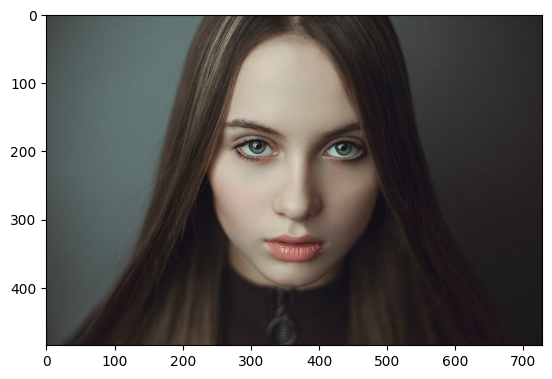

In [ ]:
img = cv2.imread("images/openEyes.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Loading Haar Cascade Classifiers for Face and Eye Detection

We use OpenCV's pre-trained Haar Cascade classifiers to detect faces and eyes in an image.

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

## Converting the Image to Grayscale

To improve the efficiency of face and eye detection, we convert the image to grayscale. 

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Detecting Faces and Eyes in the Image

We use the Haar cascade classifiers loaded earlier to detect faces and eyes in the image.

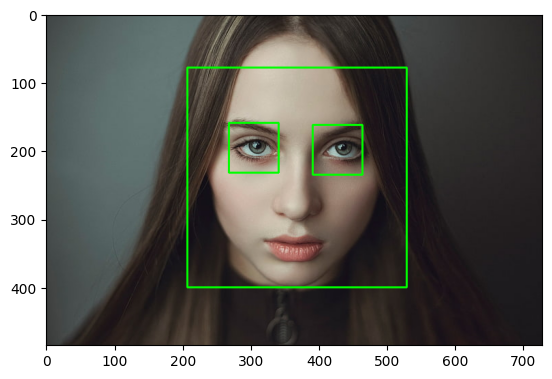

In [6]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

faces = faceCascade.detectMultiScale(img,1.1,5)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Refining Eye Detection and Extracting the Eye Region

In this section, we further refine the detection of eyes by analyzing regions of interest (ROIs) within detected eye areas.

(55, 55, 3)

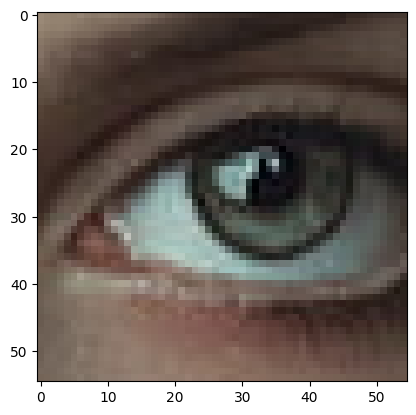

In [7]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

eyes_roi.shape

## Preprocessing the Detected Eye Region for Model Prediction

After extracting the eye region from the image, we preprocess it to match the input format required by the deep learning model.

In [8]:
IMAGE_SIZE = 256

final_image = cv2.resize(eyes_roi,(IMAGE_SIZE,IMAGE_SIZE))
final_image = np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image = final_image/255.0

final_image.shape

(1, 256, 256, 3)

## Making Predictions with the Model

Once the eye region image is preprocessed, we use the trained model to make a prediction about whether the eyes are open or closed.

In [9]:
predictions = new_model.predict(final_image)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
print(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")

Predicted: Open-Eyes.
 Confidence: 100.0%
